In [1]:
import pandas as pd
import pingouin as pg
import numpy as np
from scipy.stats import pearsonr
from scipy.stats import ttest_ind

import networkx as nx
from itertools import combinations

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# the main component
df = pd.read_csv("../../result/network_perturb_phyloP/DAGMA_thresholdAdaptive.tsv", sep="\t", header=None)
id2name = pd.read_csv("../../result/network_perturb_phyloP/valid_genes", sep="\t", index_col=0)['genes'].to_dict()
df[0] = df[0].map(id2name)
df[1] = df[1].map(id2name)
g = nx.from_pandas_edgelist(df, source=0, target=1)

current_component = {}
current_size = 0
for component in nx.connected_components(g):
    if len(component) > current_size:
        current_component = component
        current_size = len(component)

g = g.subgraph(current_component)

In [3]:
# find node such that if the node is removed, 
# the graph will be splited into >= 2 components
# and at least 2components have a size >= 7

def find_nodes_to_remove(graph):
    nodes_to_remove = []
    for node in graph.nodes():
        temp_graph = graph.copy()
        temp_graph.remove_node(node)
        
        components = list(nx.connected_components(temp_graph))
        large_components = [comp for comp in components if len(comp) >= 7]
        if nx.number_connected_components(temp_graph) >= 2 and len(large_components) >= 2:
            nodes_to_remove.append(node)
    
    return nodes_to_remove

In [4]:
node_to_remove = find_nodes_to_remove(g)
node_to_remove.sort()

In [5]:
node_to_remove

['CCPG1',
 'EEF1A1',
 'EIF5',
 'FCER1G',
 'FTH1',
 'FTL',
 'MT-CO1',
 'MT-CO2',
 'SOD2',
 'TPT1']

### RcisTarget groups

In [6]:
# MT-CO2
temp_graph = g.copy()
temp_graph.remove_node("MT-CO2")
components = list(nx.connected_components(temp_graph))
comp = [comp for comp in components if len(comp) >= 7 and len(comp) <= 20]
cluster1 = comp[0]

In [7]:
# EEF1A1 + EIF5
temp_graph = g.copy()
temp_graph.remove_node("EEF1A1")
temp_graph.remove_node("EIF5")
components = list(nx.connected_components(temp_graph))
comp = [comp for comp in components if len(comp) >= 20 and len(comp) <= 60]
cluster2 = comp[0]

In [8]:
# CCPG1
temp_graph = g.copy()
temp_graph.remove_node("CCPG1")
components = list(nx.connected_components(temp_graph))
comp = [comp for comp in components if len(comp) >= 7 and len(comp) <= 20]
cluster3 = comp[0]

In [9]:
# FCER1G
temp_graph = g.copy()
temp_graph.remove_node("FCER1G")
components = list(nx.connected_components(temp_graph))
comp = [comp for comp in components if len(comp) >= 7 and len(comp) <= 20]
cluster4 = comp[0]

In [10]:
# FTL
temp_graph = g.copy()
temp_graph.remove_node("FTL")
components = list(nx.connected_components(temp_graph))
comp = [comp for comp in components if len(comp) >= 7 and len(comp) <= 20]
cluster5 = comp[0]

In [11]:
# SOD2
temp_graph = g.copy()
temp_graph.remove_node("SOD2")
components = list(nx.connected_components(temp_graph))
comp = [comp for comp in components if len(comp) >= 7 and len(comp) <= 20]
cluster6 = comp[0]

In [12]:
# B2M + IGFL2-AS1
temp_graph = g.copy()
temp_graph.remove_node("B2M")
temp_graph.remove_node("IGFL2-AS1")
components = list(nx.connected_components(temp_graph))
comp = [comp for comp in components if len(comp) >= 7 and len(comp) <= 30]
cluster7 = comp[0]
cluster7 = set.union(cluster7, set(["B2M", "IGFL2-AS1"]))

### save file for RcisTarget

In [13]:
pd.DataFrame(cluster1).to_csv("../RcisTarget/cluster1.txt", header=False, index=False)
pd.DataFrame(cluster2).to_csv("../RcisTarget/cluster2.txt", header=False, index=False)
pd.DataFrame(cluster3).to_csv("../RcisTarget/cluster3.txt", header=False, index=False)
pd.DataFrame(cluster4).to_csv("../RcisTarget/cluster4.txt", header=False, index=False)
pd.DataFrame(cluster5).to_csv("../RcisTarget/cluster5.txt", header=False, index=False)
pd.DataFrame(cluster6).to_csv("../RcisTarget/cluster6.txt", header=False, index=False)
pd.DataFrame(cluster7).to_csv("../RcisTarget/cluster7.txt", header=False, index=False)

### partial correlation

In [14]:
X = pd.read_csv("../../result/input_perturb_phyloP/X", sep="\t", index_col=0).T

In [16]:
full1 = []
partial1 = []
for ii in cluster1:
    for jj in set(set(X.columns) - set(cluster1) - set(["MT-CO2"])):
        full1.append(pearsonr(X[ii], X[jj])[0])
        partial1.append(pg.partial_corr(data=X, x=ii, y=jj, covar="MT-CO2")['r'].values[0])

In [17]:
np.mean(full1), np.mean(partial1)

(-0.10435637581805661, -0.07242535332754192)

In [18]:
np.mean(np.abs(full1)), np.mean(np.abs(partial1))

(0.13803491209529237, 0.10163160495914234)

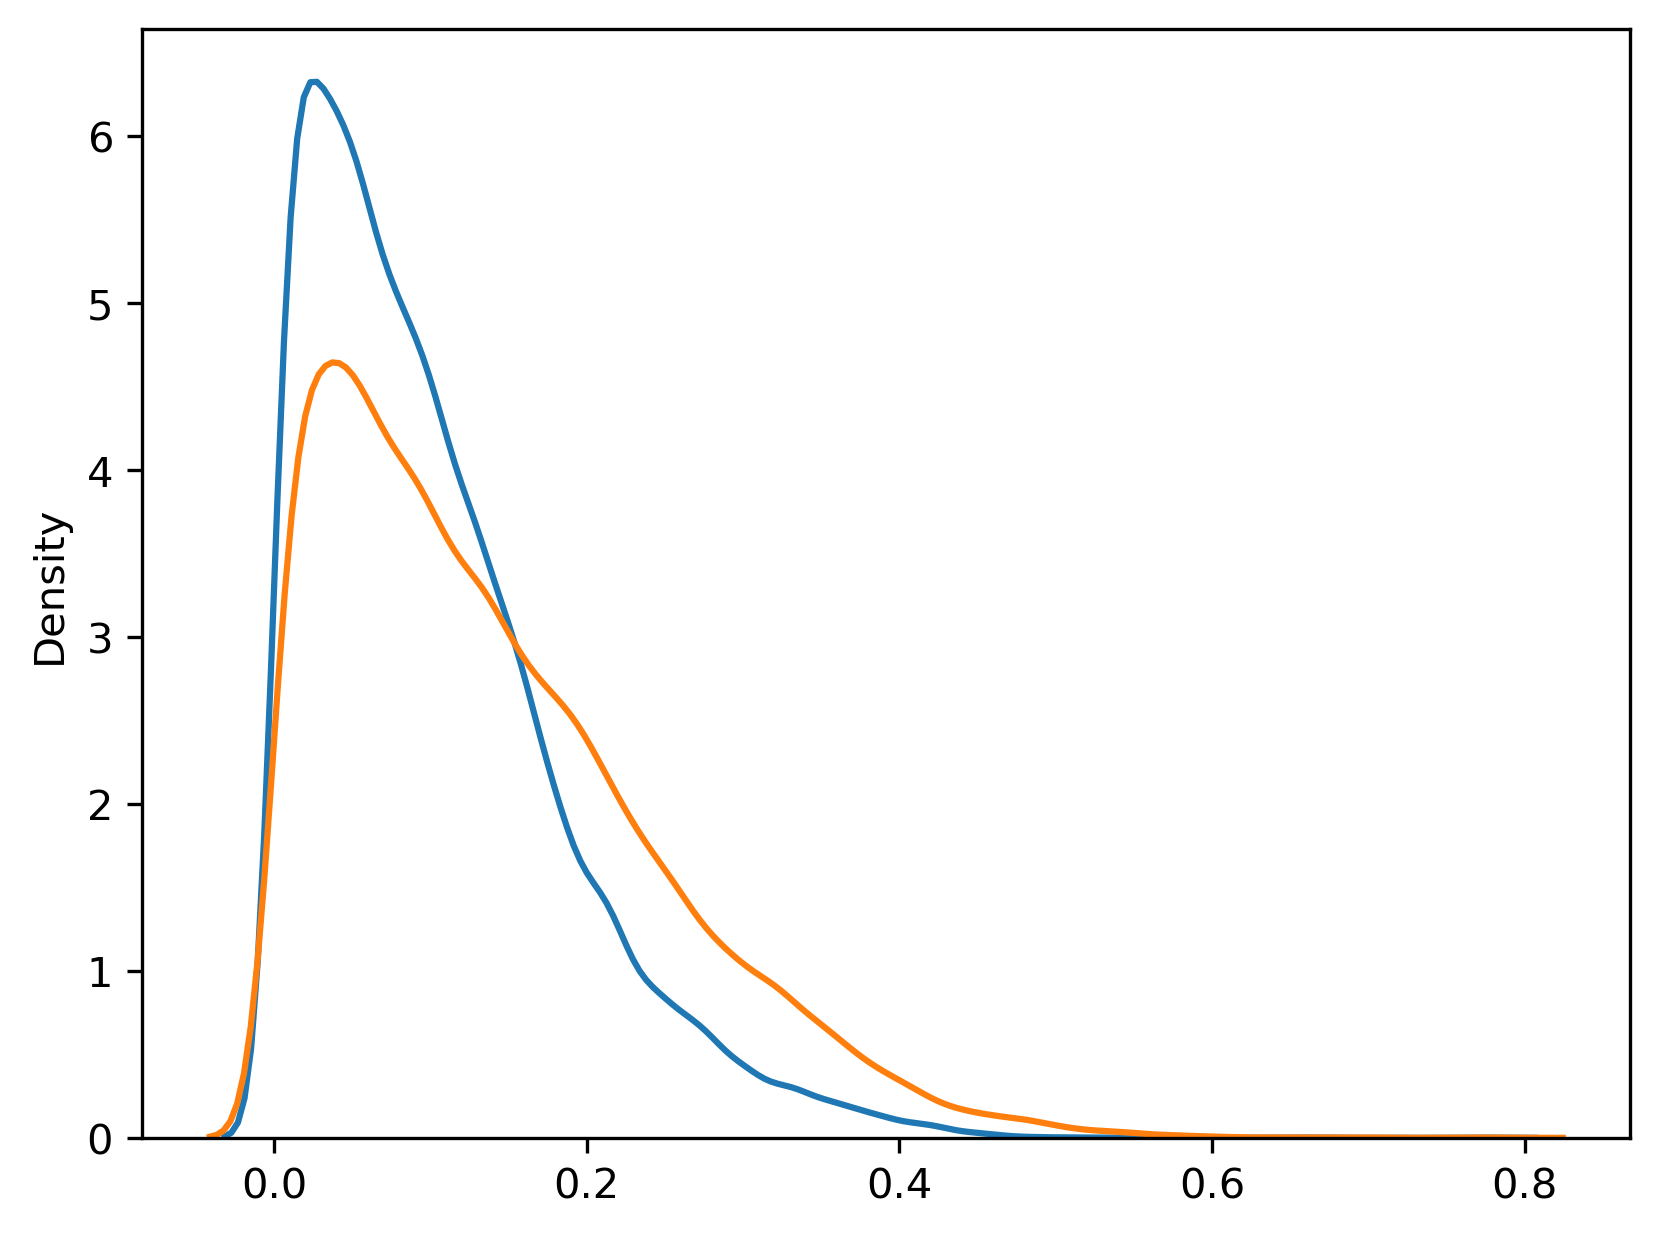

In [22]:
plt.figure(dpi=300)
sns.kdeplot(np.abs(partial1))
sns.kdeplot(np.abs(full1))
plt.savefig("../RcisTarget/cluster1.pdf", dpi="figure")

In [23]:
full2 = []
partial2 = []
for ii in cluster2:
    for jj in set(set(X.columns) - set(cluster2) - set(["EEF1A1", "EIF5"])):
        full2.append(pearsonr(X[ii], X[jj])[0])
        partial2.append(pg.partial_corr(data=X, x=ii, y=jj, covar=["EEF1A1", "EIF5"])['r'].values[0])

In [24]:
np.mean(full2), np.mean(partial2)

(-0.16407466521729555, -0.029242996285051517)

In [25]:
np.mean(np.abs(full2)), np.mean(np.abs(partial2))

(0.23270808057187578, 0.1045586674173333)

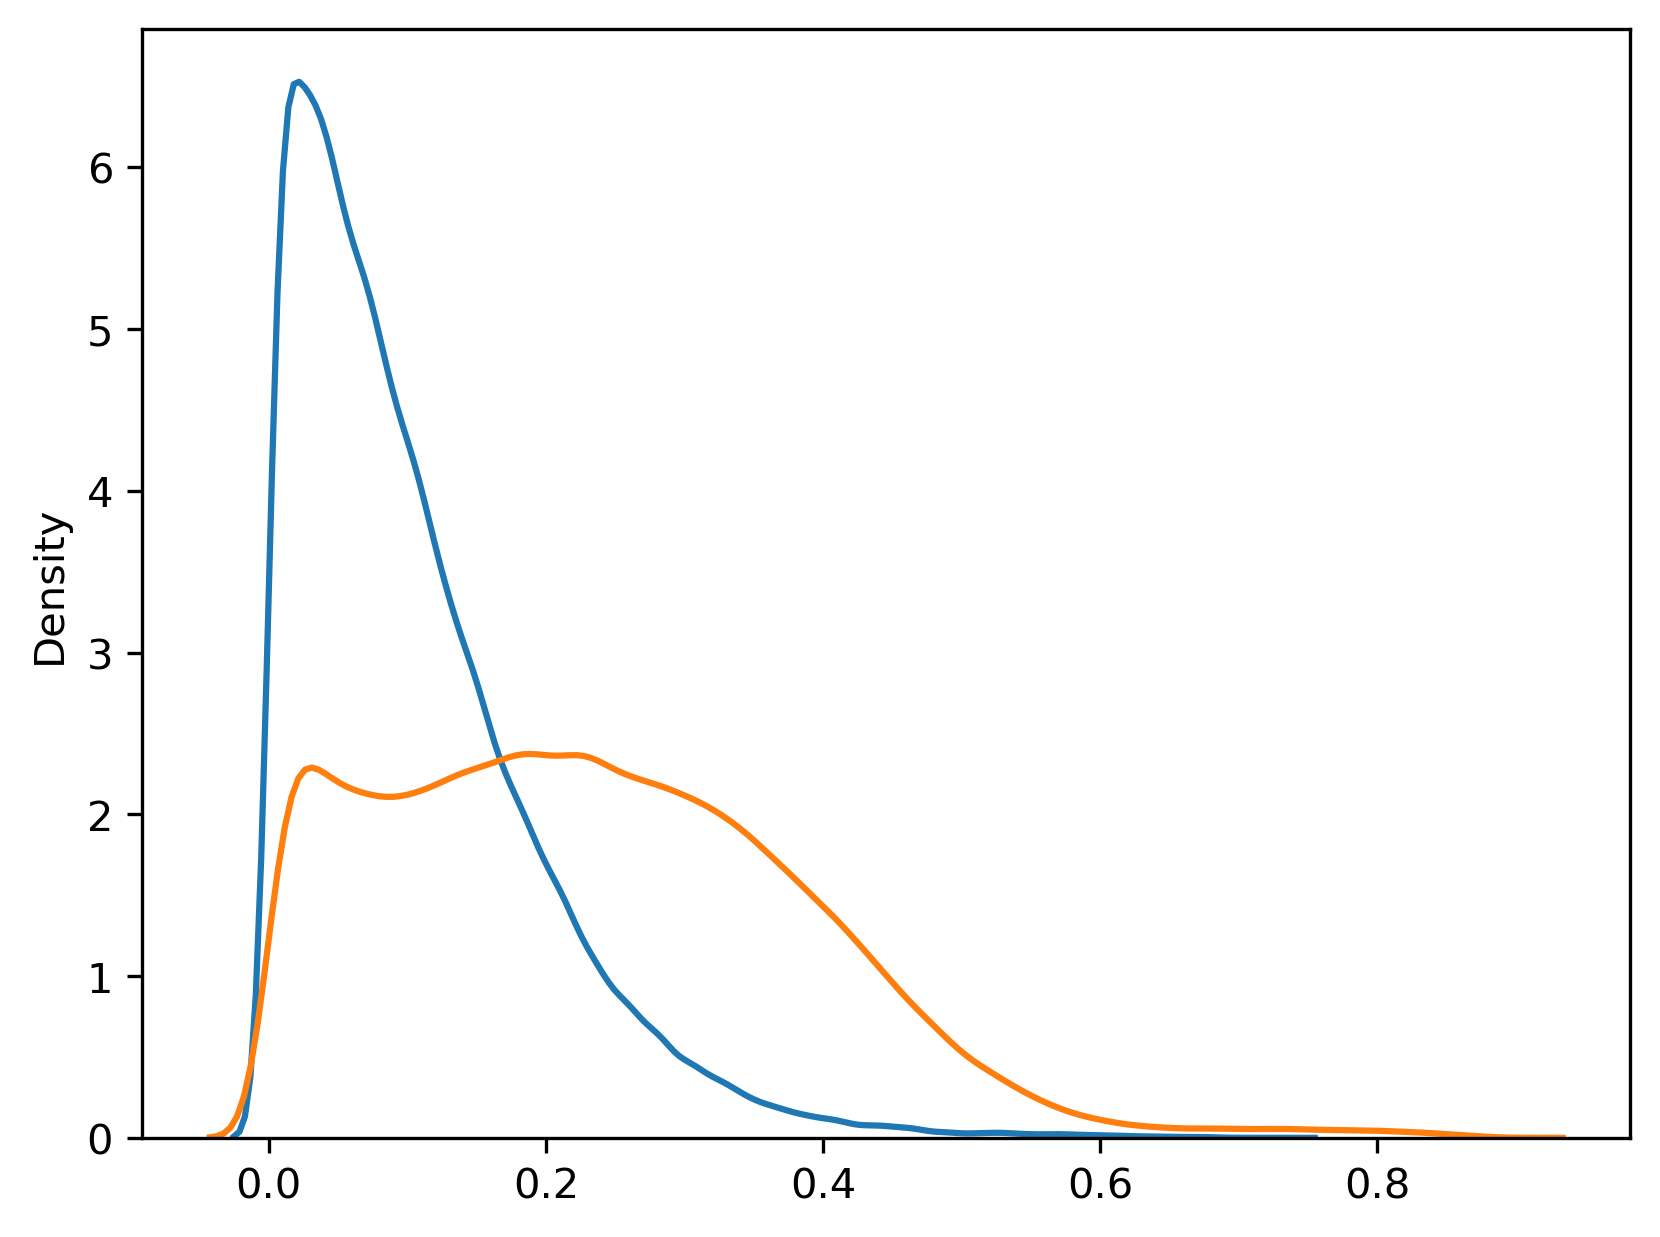

In [26]:
plt.figure(dpi=300)
sns.kdeplot(np.abs(partial2))
sns.kdeplot(np.abs(full2))
plt.savefig("../RcisTarget/cluster2.pdf", dpi="figure")

In [27]:
full3 = []
partial3 = []
for ii in cluster3:
    for jj in set(set(X.columns) - set(cluster3) - set(["CCPG1"])):
        full3.append(pearsonr(X[ii], X[jj])[0])
        partial3.append(pg.partial_corr(data=X, x=ii, y=jj, covar=["CCPG1"])['r'].values[0])

In [28]:
np.mean(full3), np.mean(partial3)

(-0.0690035981682233, -0.07834723856570723)

In [29]:
np.mean(np.abs(full3)), np.mean(np.abs(partial3))

(0.1741116540140737, 0.16080203756170064)

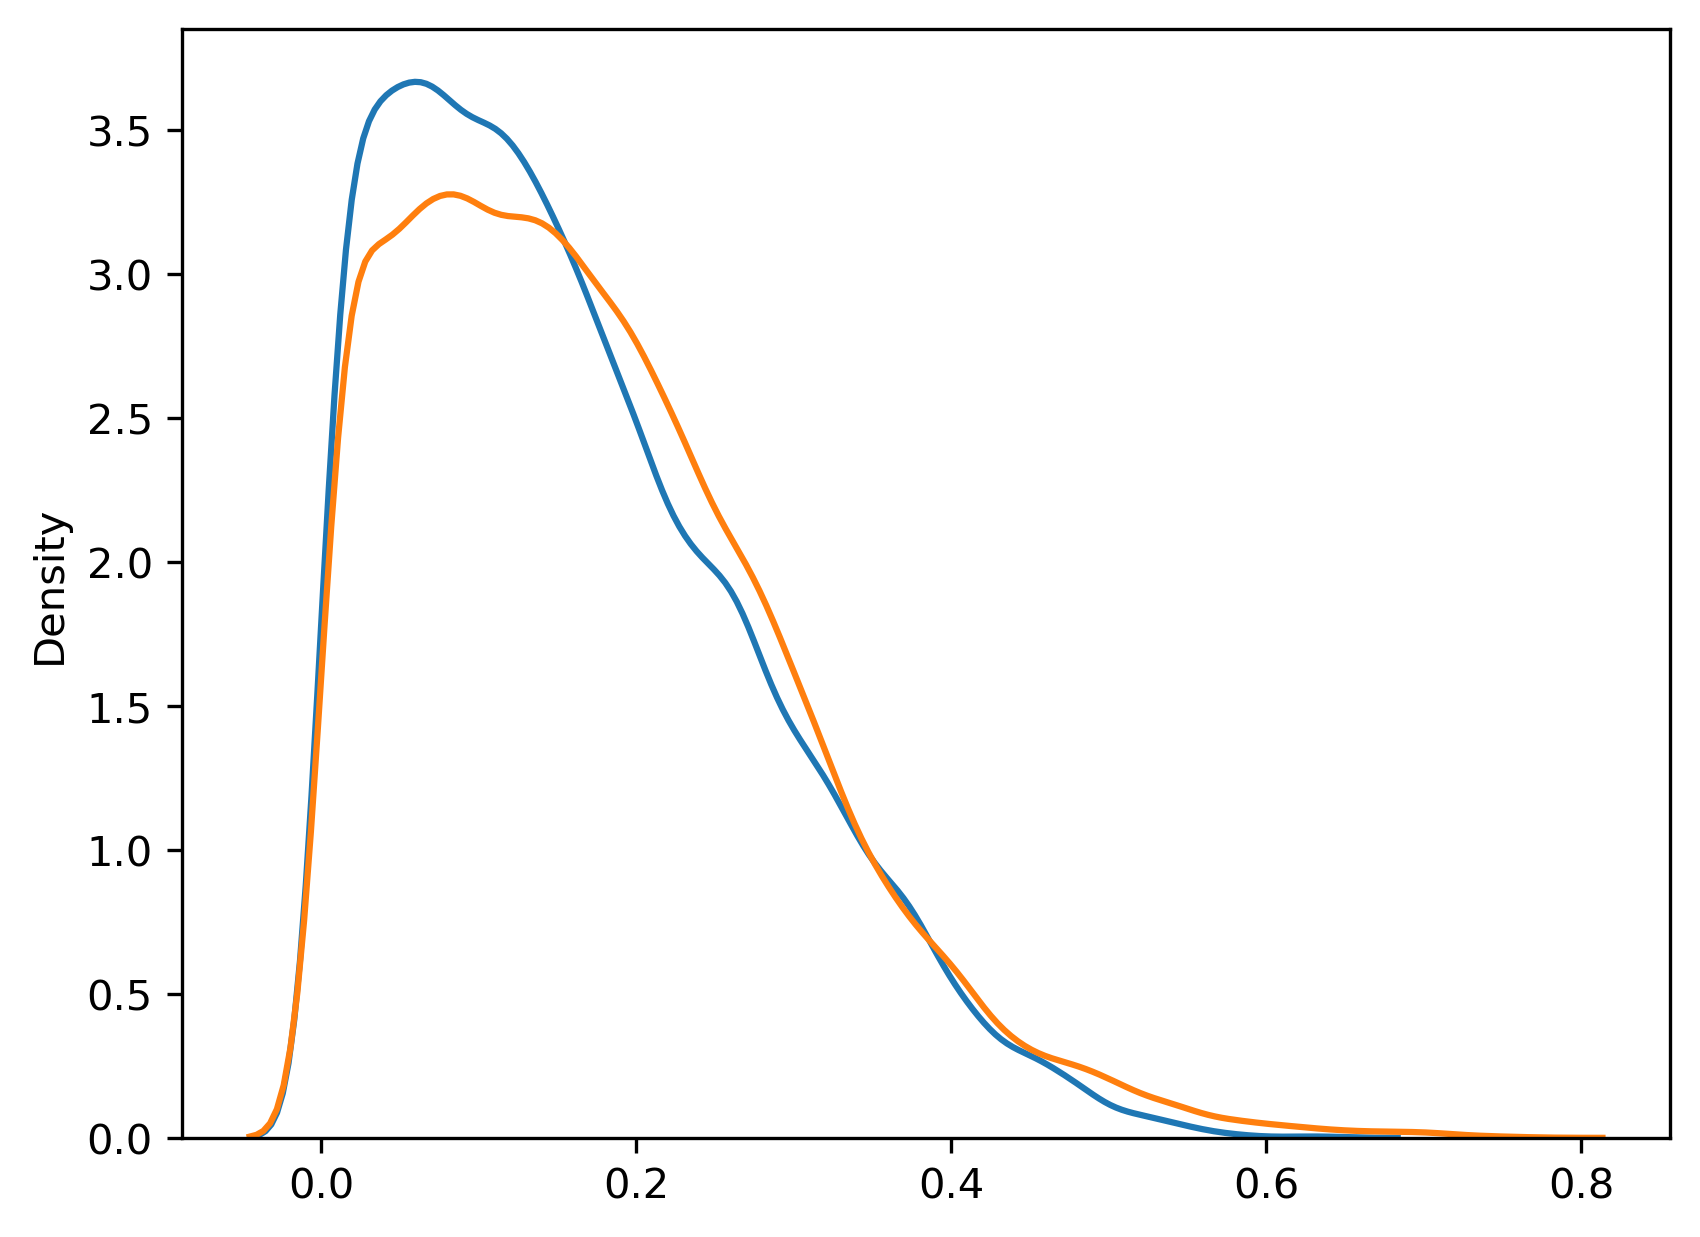

In [30]:
plt.figure(dpi=300)
sns.kdeplot(np.abs(partial3))
sns.kdeplot(np.abs(full3))
plt.savefig("../RcisTarget/cluster3.pdf", dpi="figure")

In [31]:
full4 = []
partial4 = []
for ii in cluster4:
    for jj in set(set(X.columns) - set(cluster4) - set(["FCER1G"])):
        full4.append(pearsonr(X[ii], X[jj])[0])
        partial4.append(pg.partial_corr(data=X, x=ii, y=jj, covar=["FCER1G"])['r'].values[0])

In [32]:
np.mean(full4), np.mean(partial4)

(0.018137183027646157, -0.00039277293431987434)

In [33]:
np.mean(np.abs(full4)), np.mean(np.abs(partial4))

(0.1535928546876647, 0.12027374957936039)

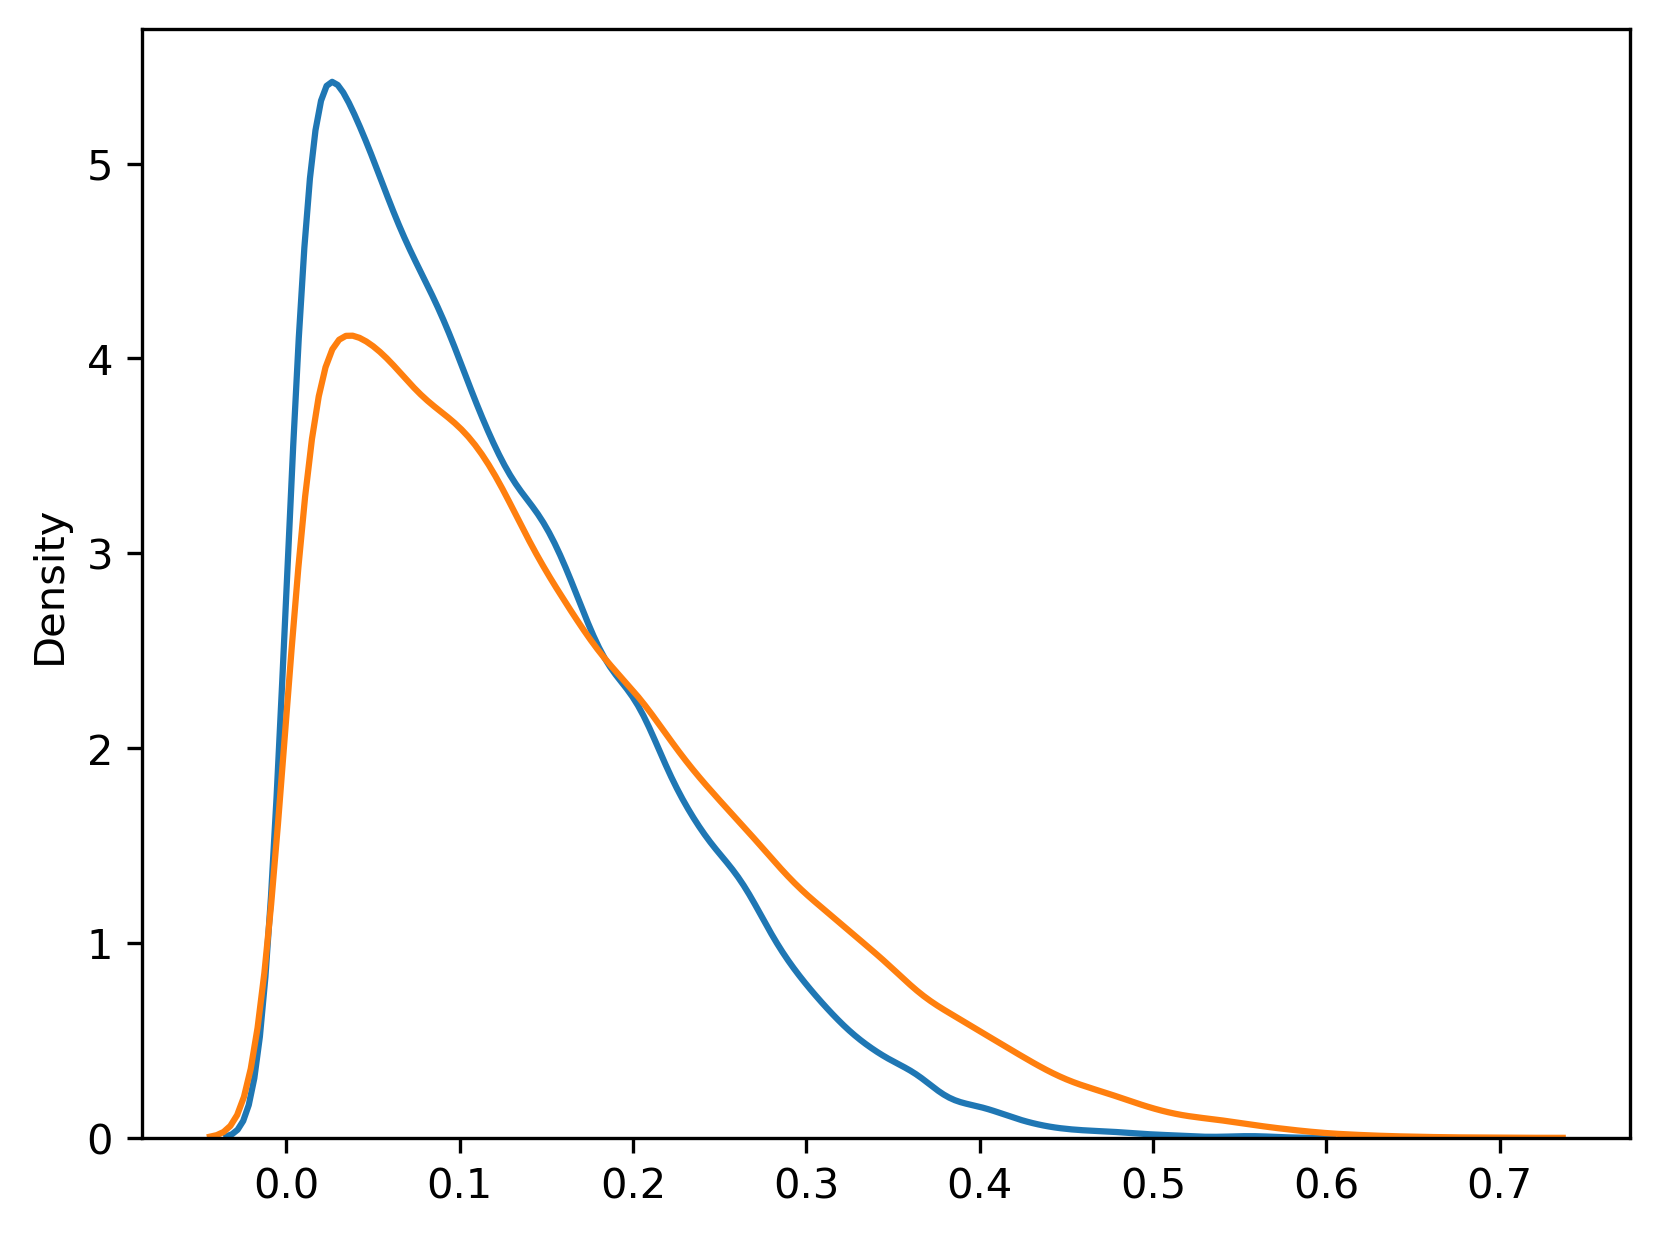

In [34]:
plt.figure(dpi=300)
sns.kdeplot(np.abs(partial4))
sns.kdeplot(np.abs(full4))
plt.savefig("../RcisTarget/cluster4.pdf", dpi="figure")

In [35]:
full5 = []
partial5 = []
for ii in cluster5:
    for jj in set(set(X.columns) - set(cluster5) - set(["FTL"])):
        full5.append(pearsonr(X[ii], X[jj])[0])
        partial5.append(pg.partial_corr(data=X, x=ii, y=jj, covar=["FTL"])['r'].values[0])

In [36]:
np.mean(full5), np.mean(partial5)

(-0.0407894179188191, -0.04023882859653385)

In [37]:
np.mean(np.abs(full5)), np.mean(np.abs(partial5))

(0.18630403720104746, 0.1843508747178431)

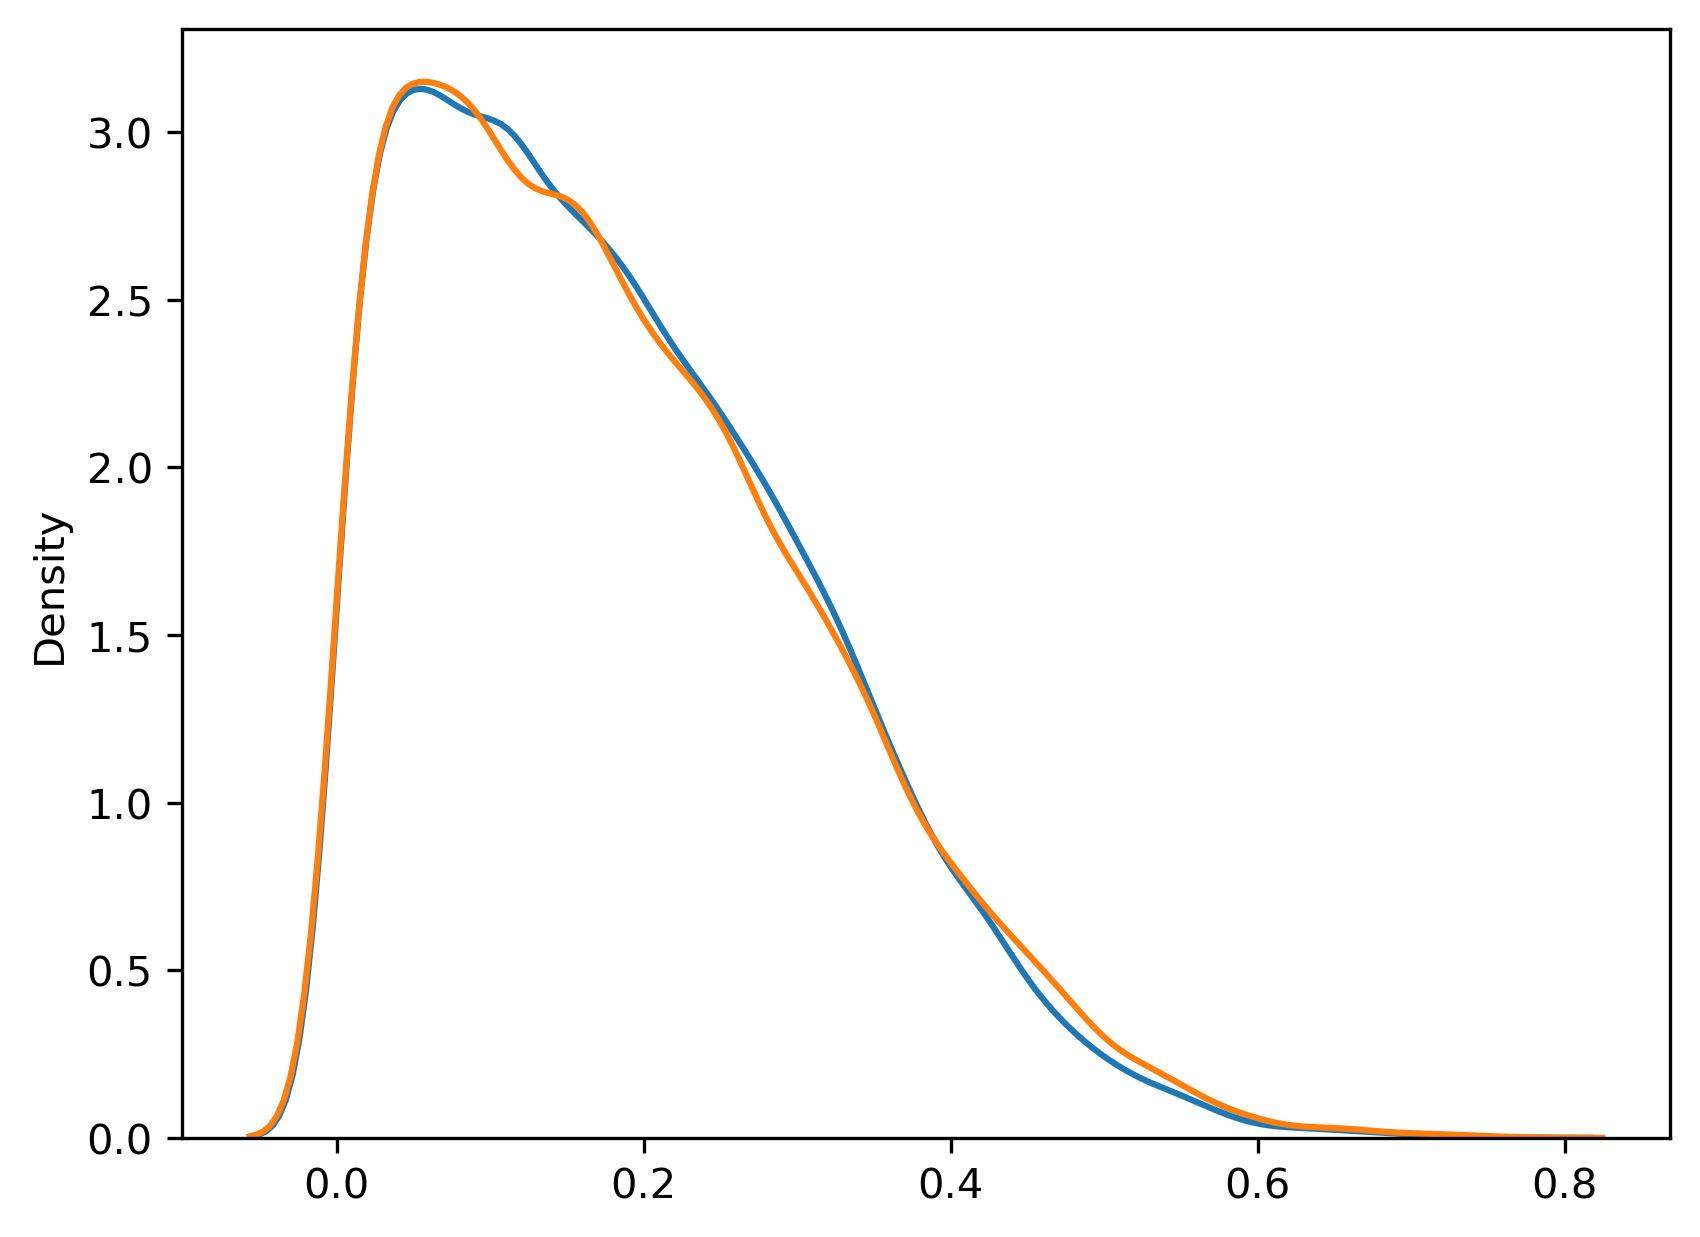

In [38]:
plt.figure(dpi=300)
sns.kdeplot(np.abs(partial5))
sns.kdeplot(np.abs(full5))
plt.savefig("../RcisTarget/cluster5.pdf", dpi="figure")

In [39]:
full6 = []
partial6 = []
for ii in cluster6:
    for jj in set(set(X.columns) - set(cluster6) - set(["SOD2"])):
        full6.append(pearsonr(X[ii], X[jj])[0])
        partial6.append(pg.partial_corr(data=X, x=ii, y=jj, covar=["SOD2"])['r'].values[0])

In [40]:
np.mean(full6), np.mean(partial6)

(0.02541295394126725, 0.022110475038800027)

In [41]:
np.mean(np.abs(full6)), np.mean(np.abs(partial6))

(0.1302859115524443, 0.13471052633663783)

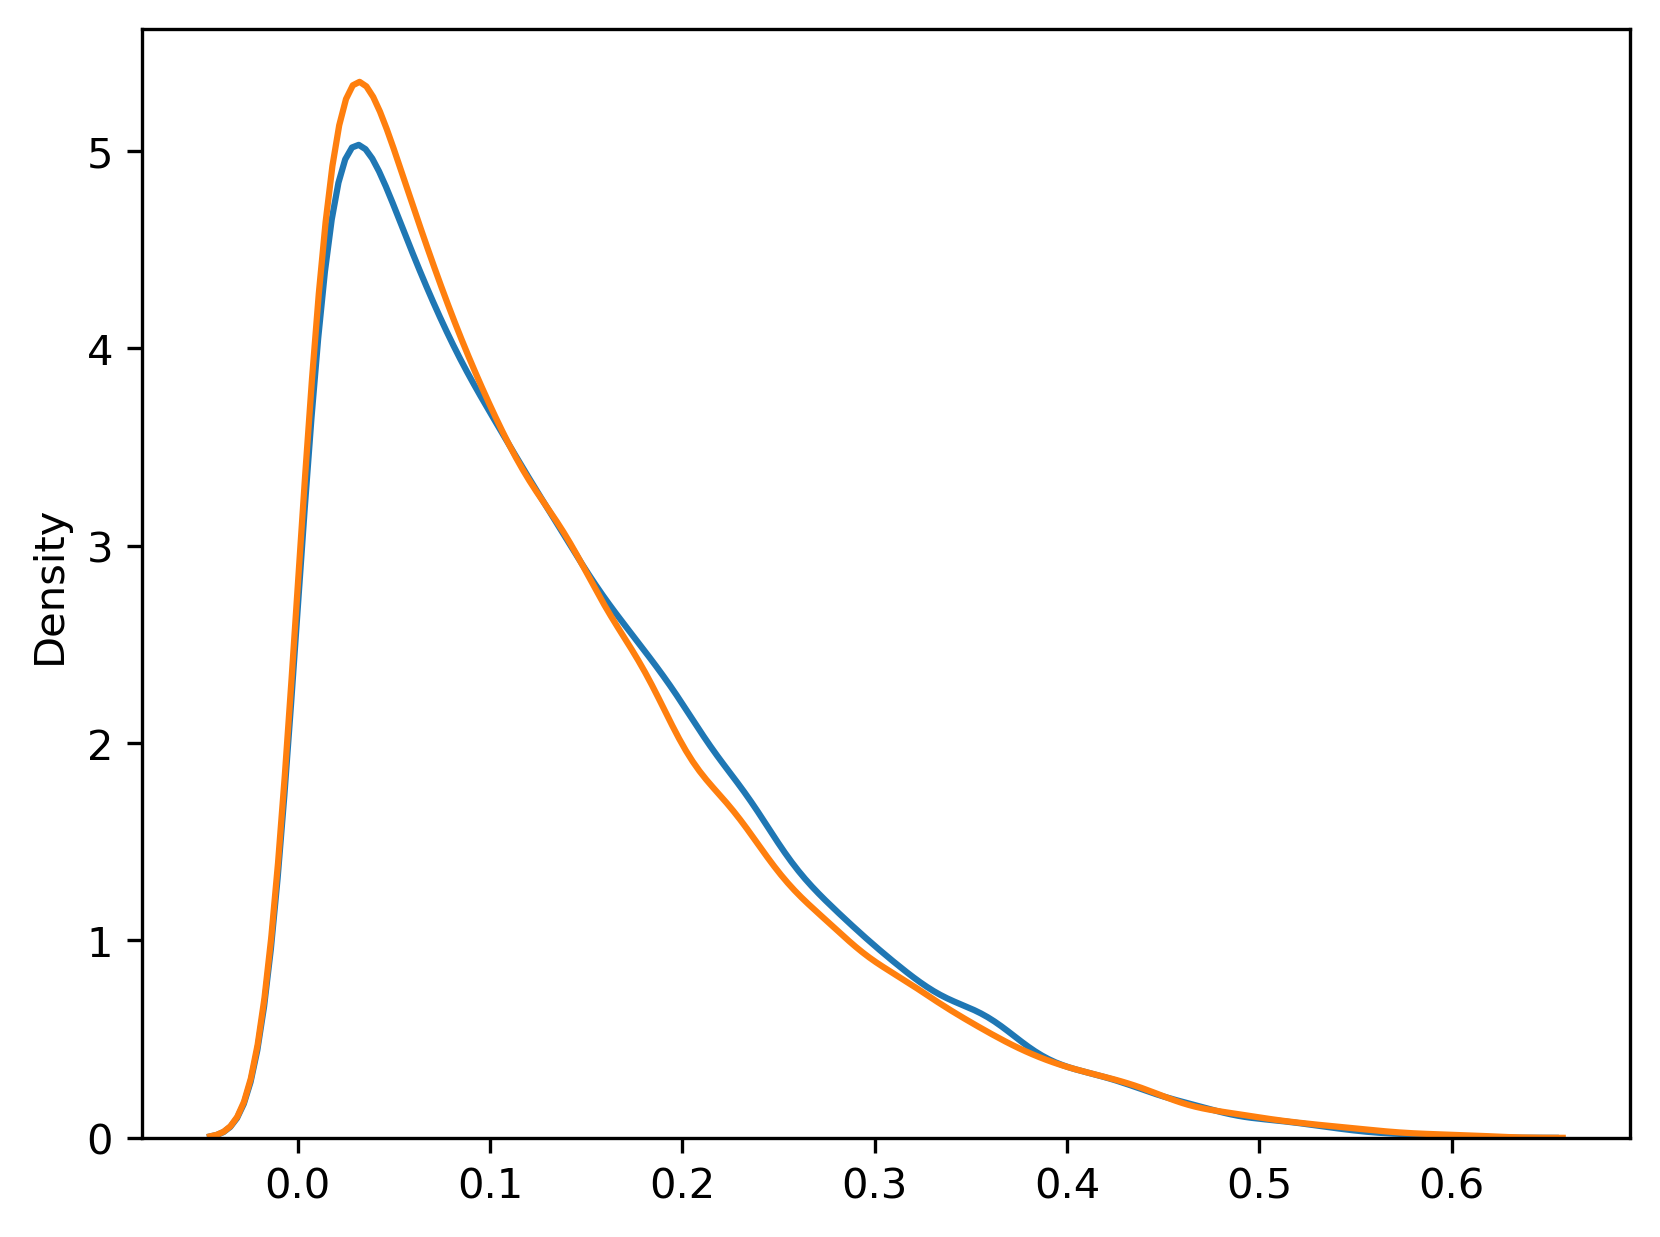

In [42]:
plt.figure(dpi=300)
sns.kdeplot(np.abs(partial6))
sns.kdeplot(np.abs(full6))
plt.savefig("../RcisTarget/cluster6.pdf", dpi="figure")

In [43]:
full7 = []
partial7 = []
for ii in cluster7:
    for jj in set(set(X.columns) - set(cluster7) - set(["CD63", "FTH1"])):
        full7.append(pearsonr(X[ii], X[jj])[0])
        partial7.append(pg.partial_corr(data=X, x=ii, y=jj, covar=["CD63", "FTH1"])['r'].values[0])

In [44]:
np.mean(full7), np.mean(partial7)

(0.04485368417642759, 0.0076763085301470215)

In [45]:
np.mean(np.abs(full7)), np.mean(np.abs(partial7))

(0.1466519388493576, 0.11327083828624303)

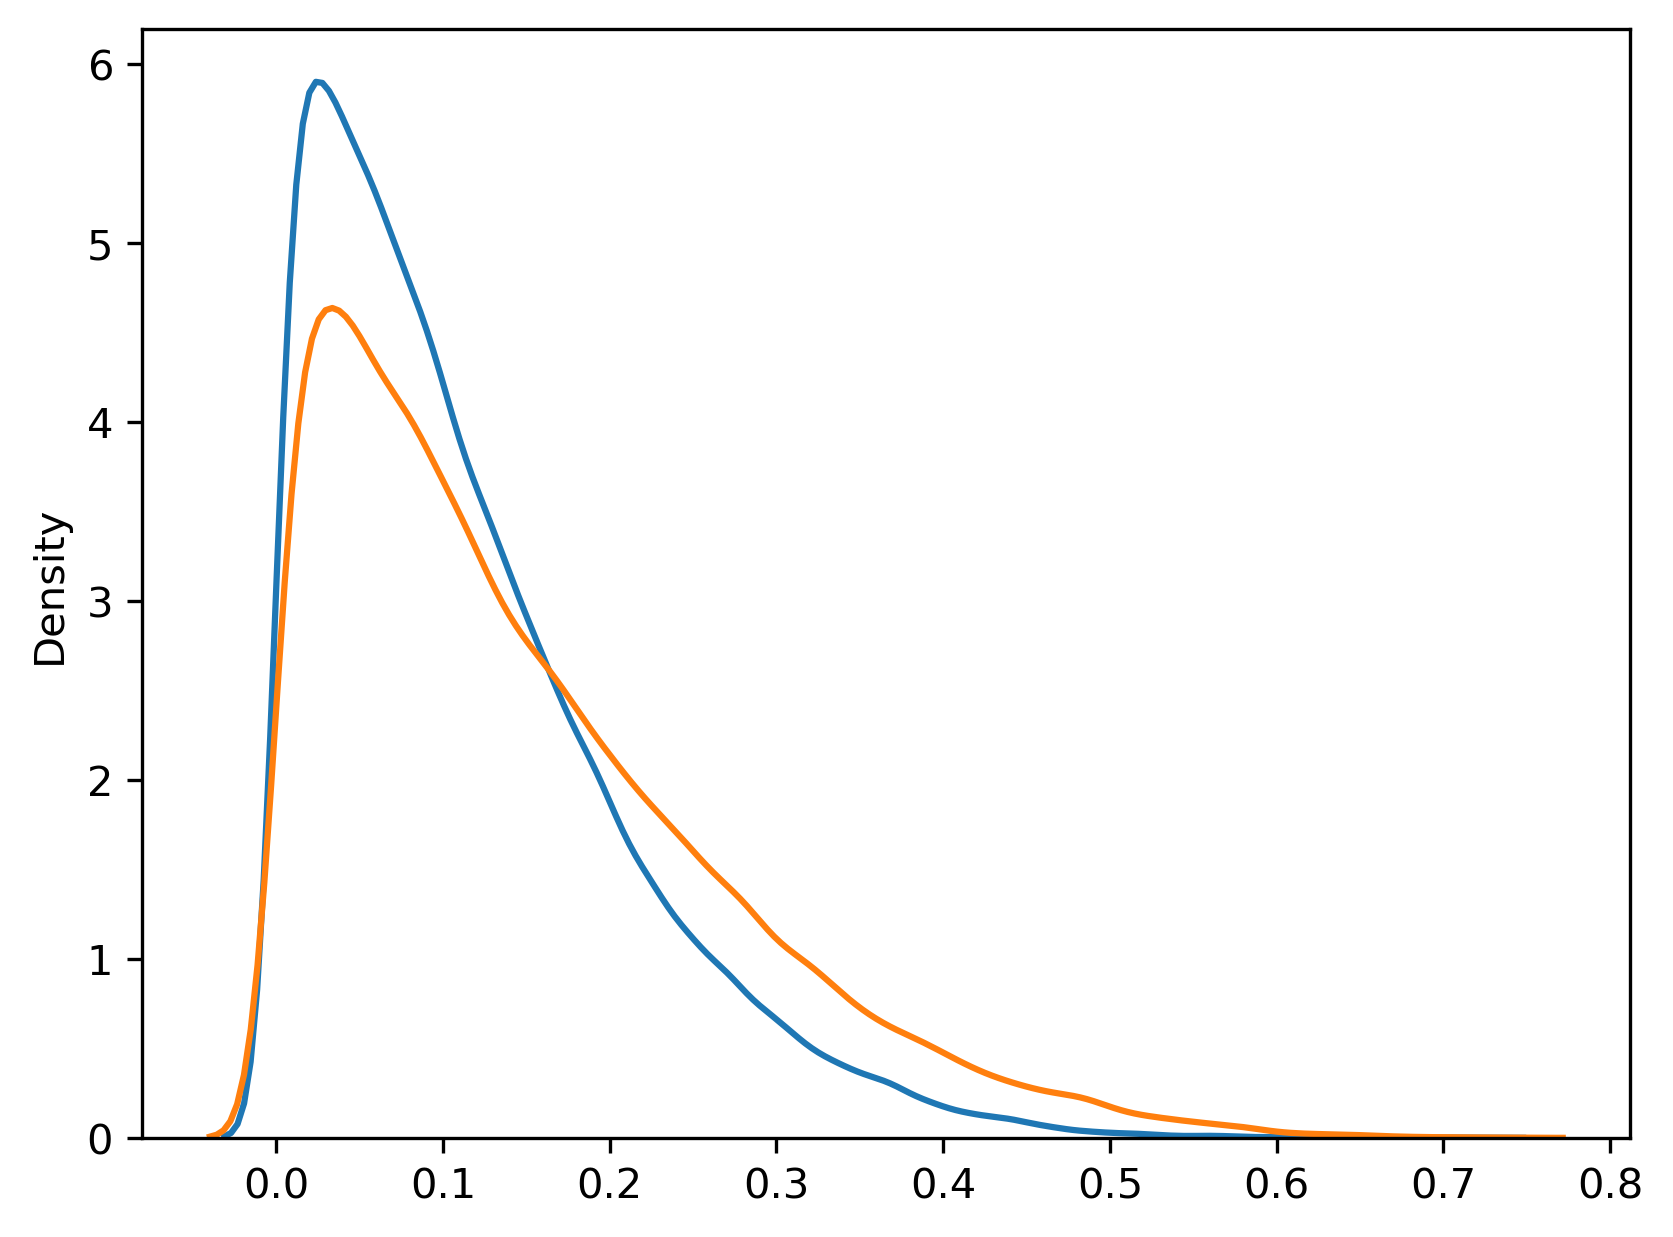

In [46]:
plt.figure(dpi=300)
sns.kdeplot(np.abs(partial7))
sns.kdeplot(np.abs(full7))
plt.savefig("../RcisTarget/cluster7.pdf", dpi="figure")